## Hyades Isochrone

**SIMBAD**  
Coordinates : 04 29 47.3 +16 56 53  
Proper motions mas/yr : 104.92 -28.00  
Parallaxes (mas): 	21.052


Using https://arxiv.org/abs/astro-ph/9707253 for age, metallicity priors.

In [1]:
import astropy
import astroquery
import matplotlib.pyplot as plt
from astroquery.utils.tap.core import TapPlus
import pandas as pd
from astropy.coordinates import ICRS
from astropy.coordinates import SkyCoord
from astropy import units as u
from astroquery.gaia import Gaia

Gaia.ROW_LIMIT = 10000

max_no = 10000
parallax_lim = [15, 30]
cone_radius = 15 # in degrees
co_str = "4:29:47.3 +16:56:53"

coord = SkyCoord(co_str, frame='icrs', unit=(u.hourangle, u.deg))


job = Gaia.launch_job_async(
    f"""SELECT TOP {max_no} *, phot_g_mean_mag+5*log10(parallax)-10 as mg, \
    DISTANCE( \
   POINT({coord.ra.degree}, {coord.dec.degree}), \
   POINT(ra, dec)) AS ang_sep \
FROM gaiadr3.gaia_source \
WHERE 1 = CONTAINS( \
   POINT({coord.ra.degree}, {coord.dec.degree}), \
   CIRCLE(ra, dec, {cone_radius})) \
AND parallax > {parallax_lim[0]} \
AND parallax < {parallax_lim[1]} \
AND parallax_over_error>10 \
AND phot_g_mean_flux_over_error>50 \
AND phot_rp_mean_flux_over_error>20 \
AND phot_bp_mean_flux_over_error>20 \
AND visibility_periods_used>8
AND astrometric_chi2_al/(astrometric_n_good_obs_al-5) < 1.44 * greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))
AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
AND astrometric_excess_noise < 1
ORDER BY ang_sep ASC;""", dump_to_file=False)

job2 = Gaia.launch_job_async(
    f"""SELECT TOP {max_no} *, phot_g_mean_mag+5*log10(parallax)-10 as mg, \
    DISTANCE( \
   POINT({coord.ra.degree}, {coord.dec.degree}), \
   POINT(ra, dec)) AS ang_sep \
FROM gaiadr3.gaia_source \
WHERE 1 = CONTAINS( \
   POINT({coord.ra.degree}, {coord.dec.degree}), \
   CIRCLE(ra, dec, {cone_radius})) \
AND parallax > {parallax_lim[0]} \
AND parallax < {parallax_lim[1]} \
ORDER BY ang_sep ASC;""", dump_to_file=False)

# NGC 6397 - 17 40 42.09 -53 40 27.6

hyades_stars = job.get_results()
hyades_no_quality = job2.get_results()

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


In [13]:
import read_mist_isochrone

iso = read_mist_models.ISO('MIST_v1.0_feh_p0.00_afe_p0.0_vvcrit0.4_basic.iso')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_93/1099319295.py", line 1, in <module>
    import read_mist_isochrone
  File "/home/jovyan/Labwork/read_mist_isochrone.py", line 3, in <module>
    import matplotlib.pyplot as plt
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/matplotlib/__init__.py", line 109, in <module>
    from . import _api, _version, cbook, docstring, rcsetup
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/matplotlib/rcsetup.py", line 27, in <module>
    from matplotlib.colors import Colormap, is_color_like
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/matplotlib/colors.py", line 52, in <module>
    from PIL.PngImagePlugin import PngInfo
  File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
  File "<frozen importlib._bootstrap>", 

TypeError: object of type 'NoneType' has no len()

In [11]:
tab

,163,8.0000000000000000E+000,1.9905088114714603E-001,1.9905056137533367E-001,-3.9555828540754702E-016,0.0000000000000000E+000,0.0000000000000000E+000.1,-2.1829412579171286E+000,-3.3036360365046300E+000,-7.3309118348573094E+001,...,2.7953692987561651E-001,3.5846171887209052E-003,8.7713602016612612E-003,6.7088008123530090E+000,1.8405270202900694E+000,2.0494336572829835E-001,6.9988182402490939E-001,2.7953692987561657E-001,3.5846171887209061E-003,-1.0000000000000000E+000
0,164,8.0,0.208883,0.208883,-4.123587e-16,0.000000,0.000000,-2.152063,-3.218337,-72.451085,...,0.279537,0.003585,0.008771,6.721381,1.830692,0.197263,6.998804e-01,2.795375e-01,0.003585,-1.0
1,165,8.0,0.218099,0.218099,-4.276893e-16,0.000000,0.000000,-2.123855,-3.141816,-71.683271,...,0.279537,0.003585,0.008771,6.732722,1.821813,0.190500,6.998811e-01,2.795369e-01,0.003585,-1.0
2,166,8.0,0.225728,0.225727,-4.422144e-16,0.000000,0.000000,-2.102859,-3.084354,-71.117260,...,0.279537,0.003585,0.008771,6.741101,1.816166,0.186116,6.998798e-01,2.795374e-01,0.003585,-1.0
3,167,8.0,0.233382,0.233381,-4.545549e-16,0.000000,0.000000,-2.081768,-3.027445,-70.555354,...,0.279537,0.003585,0.008771,6.749480,1.810253,0.181683,6.998769e-01,2.795387e-01,0.003585,-1.0
4,168,8.0,0.239361,0.239360,-4.686960e-16,0.000000,0.000000,-2.065223,-2.985238,-70.140644,...,0.279537,0.003585,0.008771,6.755703,1.805651,0.178422,6.998733e-01,2.795403e-01,0.003585,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32318,1706,9.0,2.379931,0.606440,-9.281838e-17,0.606283,0.454651,-1.019185,-2.335593,-99.000000,...,0.302393,0.002193,0.008504,7.651572,6.555751,17.520092,4.247853e-38,1.927497e-13,0.241155,6.0
32319,1707,9.0,2.380880,0.606532,-8.481967e-17,0.606374,0.459747,-1.056614,-2.355240,-99.000000,...,0.302414,0.002188,0.008501,7.643281,6.556683,17.867283,3.090325e-38,1.816090e-13,0.241508,6.0
32320,1708,9.0,2.381955,0.606636,-7.772339e-17,0.606479,0.459344,-1.093913,-2.374550,-99.000000,...,0.302437,0.002182,0.008497,7.634406,6.557642,18.245718,2.181560e-38,1.692933e-13,0.241909,6.0
32321,1709,9.0,2.383190,0.606749,-7.086621e-17,0.606592,0.462768,-1.131482,-2.394113,-99.000000,...,0.302470,0.002175,0.008492,7.624911,6.558629,18.659116,1.507247e-38,1.574876e-13,0.242340,6.0


In [61]:
print("Total Stars: ", len(hyades_stars))
print("Total Stars Before Quality Cuts: ", len(hyades_no_quality))

Total Stars:  1535
Total Stars Before Quality Cuts:  2067


Text(0, 0.5, 'Declination (Deg)')

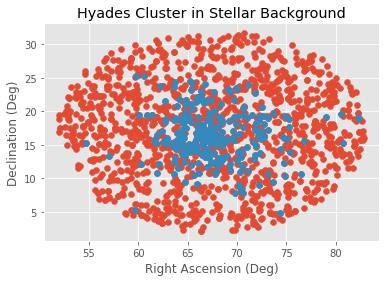

In [62]:
plt.scatter(hyades_stars['ra'], hyades_stars['dec'])
hyades_parallax = hyades_stars[(hyades_stars['parallax'] > 19) & (hyades_stars['parallax'] < 24)]
hyades_pm = hyades_stars[(hyades_stars['pmra'] > 65) & (hyades_stars['pmra'] < 125) 
                         & (hyades_stars['pmdec'] > -50) & (hyades_stars['pmdec'] < 0)]
hyades_final = hyades_stars[(hyades_stars['parallax'] > 19) & (hyades_stars['parallax'] < 24) & 
                            (hyades_stars['pmra'] > 75) & (hyades_stars['pmra'] < 125) &
                            (hyades_stars['pmdec'] > -50) & (hyades_stars['pmdec'] < 0)
                              ]
hyades_noq_final = hyades_no_quality[(hyades_no_quality['parallax'] > 19) & (hyades_no_quality['parallax'] < 24) & 
                            (hyades_no_quality['pmra'] > 75) & (hyades_no_quality['pmra'] < 125) &
                            (hyades_no_quality['pmdec'] > -50) & (hyades_no_quality['pmdec'] < 0)
                              ]
plt.scatter(hyades_final['ra'], hyades_final['dec'])
plt.title("Hyades Cluster in Stellar Background")
plt.xlabel("Right Ascension (Deg)")
plt.ylabel("Declination (Deg)")

Text(0, 0.5, 'Frequency Per Bin')

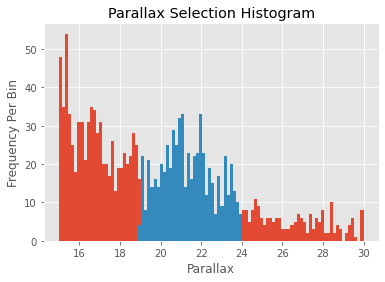

In [63]:
bins = plt.hist(hyades_stars['parallax'], bins = 100)
plt.hist(hyades_parallax['parallax'], bins = bins[1])
plt.title("Parallax Selection Histogram")
plt.xlabel("Parallax")
plt.ylabel("Frequency Per Bin")

Text(0, 0.5, 'Proper Motion (Dec)')

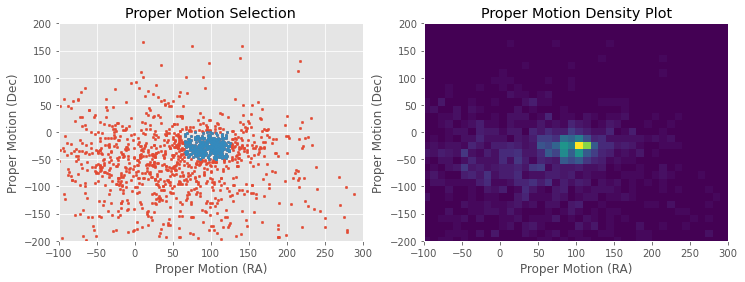

In [64]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].scatter(hyades_stars['pmra'],hyades_stars['pmdec'], s = 6)
ax[0].scatter(hyades_pm['pmra'], hyades_pm['pmdec'], s = 6)
ax[0].set_title("Proper Motion Selection")
ax[0].set_xlabel("Proper Motion (RA)")
ax[0].set_ylabel("Proper Motion (Dec)")
ax[0].set_xlim((-100, 300))
ax[0].set_ylim((-200, 200))
ax[1].hist2d(hyades_stars['pmra'],hyades_stars['pmdec'], bins = 100)
ax[1].sharey(ax[0])
ax[1].sharex(ax[0])
ax[1].set_title("Proper Motion Density Plot")
ax[1].set_xlabel("Proper Motion (RA)")
ax[1].set_ylabel("Proper Motion (Dec)")

In [65]:
print("Total Stars Post All Cuts: ", len(hyades_final))

Total Stars Post All Cuts:  275


Text(0, 0.5, '$M_G$')

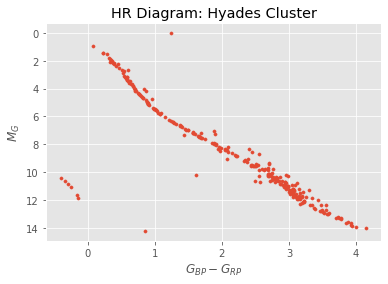

In [66]:
plt.style.use('ggplot')
#plt.scatter(hyades_noq_final['bp_g'] - hyades_noq_final['g_rp'], hyades_noq_final['mg'], s = 10)
plt.scatter(hyades_final['bp_rp'], hyades_final['mg'], s = 10)
plt.gca().invert_yaxis()
plt.title("HR Diagram: Hyades Cluster")
plt.xlabel("$G_{BP} - G_{RP}$")
plt.ylabel("$M_G$")

Text(0, 0.5, '$M_G$')

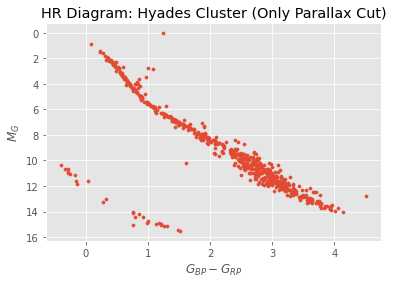

In [68]:
plt.style.use('ggplot')
#plt.scatter(hyades_noq_final['bp_g'] - hyades_noq_final['g_rp'], hyades_noq_final['mg'], s = 10)
plt.scatter(hyades_parallax['bp_rp'], hyades_parallax['mg'], s = 10)
plt.gca().invert_yaxis()
plt.title("HR Diagram: Hyades Cluster (Only Parallax Cut)")
plt.xlabel("$G_{BP} - G_{RP}$")
plt.ylabel("$M_G$")

Text(0, 0.5, '$M_G$')

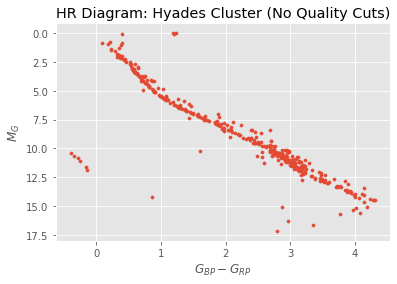

In [69]:
plt.style.use('ggplot')
plt.scatter(hyades_noq_final['bp_rp'], hyades_noq_final['mg'], s = 10)
plt.gca().invert_yaxis()
plt.title("HR Diagram: Hyades Cluster (No Quality Cuts)")
plt.xlabel("$G_{BP} - G_{RP}$")
plt.ylabel("$M_G$")

**Cuts made by Babisnaux:**  
  
visibility_periods_used>8  
sqrt(astrometric_chi2_al / (astrometric_n_good_obs_al - 5)) < 1.2 max(1, exp(−0.2(G − 19.5)))  
MG =G + 5 + 5 log10($/1000.)  
parallax_over_error>10  
phot_g_mean_flux_over_error>50  
phot_rp_mean_flux_over_error>20  
phot_bp_mean_flux_over_error>20  
phot_bp_rp_excess_factor> 1.0+0.015 (GBP −GRP)^2  
phot_bp_rp_excess_factor< 1.3 + 0.06 (GBP − GRP)2  

## M67 Isochrone

**SIMBAD**  
Coordinates : 08 51 23.0 +11 48 50  
Proper motions mas/yr : -10.9737 -2.9396
Parallaxes (mas): 	1.1325


In [119]:
import astropy
import astroquery
import matplotlib.pyplot as plt
from astroquery.utils.tap.core import TapPlus
import pandas as pd
from astropy.coordinates import ICRS
from astropy.coordinates import SkyCoord
from astropy import units as u
from astroquery.gaia import Gaia

Gaia.ROW_LIMIT = 10000

max_no = 10000
parallax_lim = [0, 3]
cone_radius = 0.5 # in degrees
co_str = "08:51:23.0 +11:48:50"

coord = SkyCoord(co_str, frame='icrs', unit=(u.hourangle, u.deg))


job = Gaia.launch_job_async(
    f"""SELECT TOP {max_no} *, phot_g_mean_mag+5*log10(parallax)-10 as mg, \
    DISTANCE( \
   POINT({coord.ra.degree}, {coord.dec.degree}), \
   POINT(ra, dec)) AS ang_sep \
FROM gaiadr3.gaia_source \
WHERE 1 = CONTAINS( \
   POINT({coord.ra.degree}, {coord.dec.degree}), \
   CIRCLE(ra, dec, {cone_radius})) \
AND parallax > {parallax_lim[0]} \
AND parallax < {parallax_lim[1]} \
AND parallax_over_error>10 \
AND phot_g_mean_flux_over_error>50 \
AND phot_rp_mean_flux_over_error>20 \
AND phot_bp_mean_flux_over_error>20 \
AND visibility_periods_used>8
AND astrometric_chi2_al/(astrometric_n_good_obs_al-5) < 1.44 * greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))
AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
AND astrometric_excess_noise < 1
ORDER BY ang_sep ASC;""", dump_to_file=False)

job2 = Gaia.launch_job_async(
    f"""SELECT TOP {max_no} *, phot_g_mean_mag+5*log10(parallax)-10 as mg, \
    DISTANCE( \
   POINT({coord.ra.degree}, {coord.dec.degree}), \
   POINT(ra, dec)) AS ang_sep \
FROM gaiadr3.gaia_source \
WHERE 1 = CONTAINS( \
   POINT({coord.ra.degree}, {coord.dec.degree}), \
   CIRCLE(ra, dec, {cone_radius})) \
AND parallax > {parallax_lim[0]} \
AND parallax < {parallax_lim[1]} \
ORDER BY ang_sep ASC;""", dump_to_file=False)

# NGC 6397 - 17 40 42.09 -53 40 27.6

hyades_stars = job.get_results()
hyades_no_quality = job2.get_results()

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


In [120]:
print("Total Stars: ", len(hyades_stars))
print("Total Stars Before Quality Cuts: ", len(hyades_no_quality))

Total Stars:  1608
Total Stars Before Quality Cuts:  4598


Text(0, 0.5, 'Declination (Deg)')

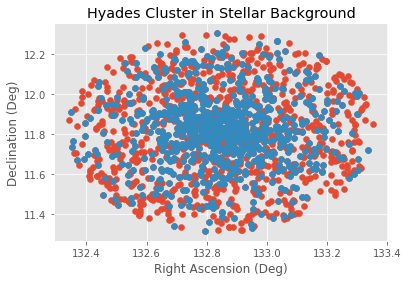

In [121]:
plt.scatter(hyades_stars['ra'], hyades_stars['dec'])

para_min = 1.0
para_max = 1.3
pmra_min = -13
pmra_max = -10
pmdec_min = -3.8
pmdec_max = -2

hyades_parallax = hyades_stars[(hyades_stars['parallax'] > para_min) & (hyades_stars['parallax'] < para_max)]
hyades_pm = hyades_stars[(hyades_stars['pmra'] > pmra_min) & (hyades_stars['pmra'] < pmra_max) 
                         & (hyades_stars['pmdec'] > pmdec_min) & (hyades_stars['pmdec'] < pmdec_max)]
hyades_final = hyades_stars[(hyades_stars['parallax'] > para_min) & (hyades_stars['parallax'] < para_max) & 
                            (hyades_stars['pmra'] > pmra_min) & (hyades_stars['pmra'] < pmra_max) &
                            (hyades_stars['pmdec'] > pmdec_min) & (hyades_stars['pmdec'] < pmdec_max)
                              ]
hyades_noq_final = hyades_no_quality[(hyades_no_quality['parallax'] > para_min) & (hyades_no_quality['parallax'] < para_max) & 
                            (hyades_no_quality['pmra'] > pmra_min) & (hyades_no_quality['pmra'] < pmra_max) &
                            (hyades_no_quality['pmdec'] > pmdec_min) & (hyades_no_quality['pmdec'] < pmdec_max)
                              ]
plt.scatter(hyades_final['ra'], hyades_final['dec'])
plt.title("Hyades Cluster in Stellar Background")
plt.xlabel("Right Ascension (Deg)")
plt.ylabel("Declination (Deg)")

Text(0, 0.5, 'Frequency Per Bin')

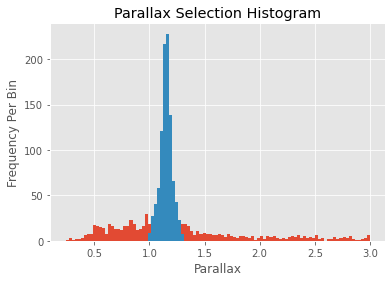

In [122]:
bins = plt.hist(hyades_stars['parallax'], bins = 100)
plt.hist(hyades_parallax['parallax'], bins = bins[1])
plt.title("Parallax Selection Histogram")
plt.xlabel("Parallax")
plt.ylabel("Frequency Per Bin")

Text(0, 0.5, 'Proper Motion (Dec)')

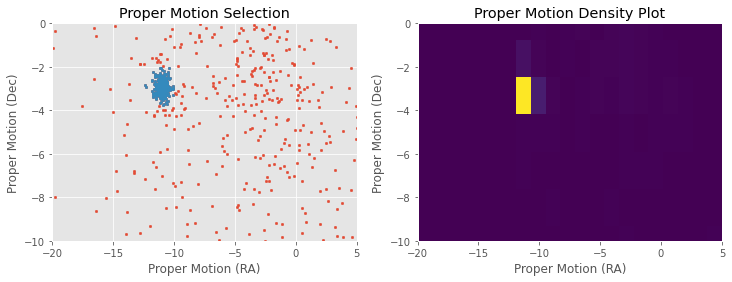

In [123]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].scatter(hyades_stars['pmra'],hyades_stars['pmdec'], s = 6)
ax[0].scatter(hyades_pm['pmra'], hyades_pm['pmdec'], s = 6)
ax[0].set_title("Proper Motion Selection")
ax[0].set_xlabel("Proper Motion (RA)")
ax[0].set_ylabel("Proper Motion (Dec)")
ax[0].set_xlim((-20, 5))
ax[0].set_ylim((-10, 0))
ax[1].hist2d(hyades_stars['pmra'],hyades_stars['pmdec'], bins = 100)
ax[1].sharey(ax[0])
ax[1].sharex(ax[0])
ax[1].set_title("Proper Motion Density Plot")
ax[1].set_xlabel("Proper Motion (RA)")
ax[1].set_ylabel("Proper Motion (Dec)")

In [124]:
print("Total Stars Post All Cuts: ", len(hyades_final))

Total Stars Post All Cuts:  839


Text(0, 0.5, '$M_G$')

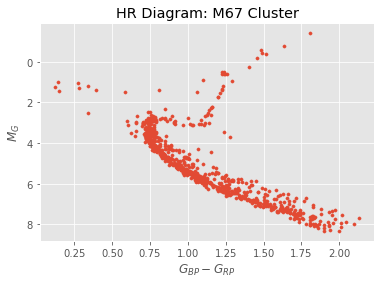

In [125]:
plt.style.use('ggplot')
#plt.scatter(hyades_noq_final['bp_g'] - hyades_noq_final['g_rp'], hyades_noq_final['mg'], s = 10)
#plt.scatter(hyades_final['bp_g'] - hyades_final['g_rp'], hyades_final['mg'], s = 10)
plt.scatter(hyades_final['bp_rp'], hyades_final['mg'], s = 10)
plt.gca().invert_yaxis()
plt.title("HR Diagram: M67 Cluster")
plt.xlabel("$G_{BP} - G_{RP}$")
plt.ylabel("$M_G$")

In [ ]:
plt.style.use('ggplot')
#plt.scatter(hyades_noq_final['bp_g'] - hyades_noq_final['g_rp'], hyades_noq_final['mg'], s = 10)
plt.scatter(hyades_parallax['bp_rp'], hyades_parallax['mg'], s = 10)
plt.gca().invert_yaxis()
plt.title("HR Diagram: M67 Cluster (Only Parallax Cut)")
plt.xlabel("$G_{BP} - G_{RP}$")
plt.ylabel("$M_G$")

Text(0, 0.5, '$M_G$')

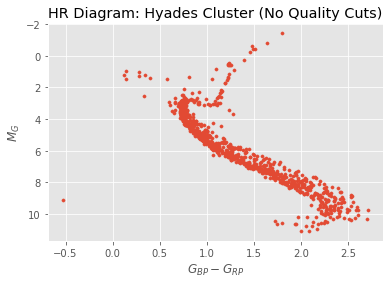

In [54]:
plt.style.use('ggplot')
plt.scatter(hyades_noq_final['bp_rp'], hyades_noq_final['mg'], s = 10)
plt.gca().invert_yaxis()
plt.title("HR Diagram: M67 Cluster (No Quality Cuts)")
plt.xlabel("$G_{BP} - G_{RP}$")
plt.ylabel("$M_G$")

Text(0, 0.5, '$M_G$')

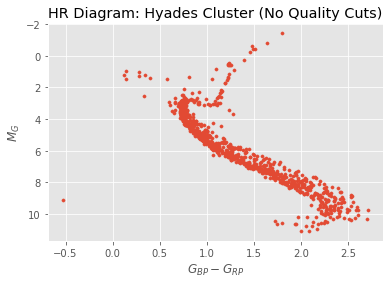

In [54]:
plt.style.use('ggplot')
plt.scatter(hyades_noq_final['bp_rp'], hyades_noq_final['mg'], s = 10)
plt.gca().invert_yaxis()
plt.title("HR Diagram: Hyades Cluster (No Quality Cuts)")
plt.xlabel("$G_{BP} - G_{RP}$")
plt.ylabel("$M_G$")

## NGC 6397

**SIMBAD**  
Coordinates : 17 40 42.09 -53 40 27.6  
Proper motions mas/yr : 3.30 -17.60  
Parallaxes (mas): 0.416

Note: I had to remove a parallax error cut in the GAIA Query since it caused me to miss all stars below 
magnitude of 4.

In [29]:
import astropy
import astroquery
import matplotlib.pyplot as plt
from astroquery.utils.tap.core import TapPlus
import pandas as pd
from astropy.coordinates import ICRS
from astropy.coordinates import SkyCoord
from astropy import units as u
from astroquery.gaia import Gaia

Gaia.ROW_LIMIT = 10000

max_no = 10000
parallax_lim = [0, 1]
cone_radius = 0.5 # in degrees
co_str = "17:40:42.09 -53:40:27.6"

coord = SkyCoord(co_str, frame='icrs', unit=(u.hourangle, u.deg))


job = Gaia.launch_job_async(
    f"""SELECT TOP {max_no} *, phot_g_mean_mag+5*log10(parallax)-10 as mg, \
    DISTANCE( \
   POINT({coord.ra.degree}, {coord.dec.degree}), \
   POINT(ra, dec)) AS ang_sep \
FROM gaiadr3.gaia_source \
WHERE 1 = CONTAINS( \
   POINT({coord.ra.degree}, {coord.dec.degree}), \
   CIRCLE(ra, dec, {cone_radius})) \
AND parallax > {parallax_lim[0]} \
AND parallax < {parallax_lim[1]} \
AND phot_g_mean_flux_over_error>50 \
AND phot_rp_mean_flux_over_error>20 \
AND phot_bp_mean_flux_over_error>20 \
AND visibility_periods_used>8
AND astrometric_chi2_al/(astrometric_n_good_obs_al-5) < 1.44 * greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))
AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
AND astrometric_excess_noise < 1
ORDER BY ang_sep ASC;""", dump_to_file=False)

job2 = Gaia.launch_job_async(
    f"""SELECT TOP {max_no} *, phot_g_mean_mag+5*log10(parallax)-10 as mg, \
    DISTANCE( \
   POINT({coord.ra.degree}, {coord.dec.degree}), \
   POINT(ra, dec)) AS ang_sep \
FROM gaiadr3.gaia_source \
WHERE 1 = CONTAINS( \
   POINT({coord.ra.degree}, {coord.dec.degree}), \
   CIRCLE(ra, dec, {cone_radius})) \
AND parallax > {parallax_lim[0]} \
AND parallax < {parallax_lim[1]} \
ORDER BY ang_sep ASC;""", dump_to_file=False)

# NGC 6397 - 17 40 42.09 -53 40 27.6

hyades_stars = job.get_results()
hyades_no_quality = job2.get_results()

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


In [30]:
print("Total Stars: ", len(hyades_stars))
#print("Total Stars Before Quality Cuts: ", len(hyades_no_quality))

Total Stars:  10000


Text(0, 0.5, 'Declination (Deg)')

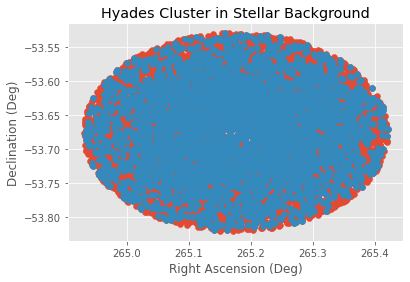

In [47]:
plt.scatter(hyades_stars['ra'], hyades_stars['dec'])

para_min = 0.32 #0.32
para_max = 0.47 #0.47
pmra_min = 2
pmra_max = 4.5
pmdec_min = -19
pmdec_max = -16

hyades_parallax = hyades_stars[(hyades_stars['parallax'] > para_min) & (hyades_stars['parallax'] < para_max)]
hyades_pm = hyades_stars[(hyades_stars['pmra'] > pmra_min) & (hyades_stars['pmra'] < pmra_max) 
                         & (hyades_stars['pmdec'] > pmdec_min) & (hyades_stars['pmdec'] < pmdec_max)]
hyades_final = hyades_stars[(hyades_stars['parallax'] > para_min) & (hyades_stars['parallax'] < para_max) & 
                            (hyades_stars['pmra'] > pmra_min) & (hyades_stars['pmra'] < pmra_max) &
                            (hyades_stars['pmdec'] > pmdec_min) & (hyades_stars['pmdec'] < pmdec_max)
                              ]
hyades_noq_final = hyades_no_quality[(hyades_no_quality['parallax'] > para_min) & (hyades_no_quality['parallax'] < para_max) & 
                            (hyades_no_quality['pmra'] > pmra_min) & (hyades_no_quality['pmra'] < pmra_max) &
                            (hyades_no_quality['pmdec'] > pmdec_min) & (hyades_no_quality['pmdec'] < pmdec_max)
                              ]
plt.scatter(hyades_final['ra'], hyades_final['dec'])
plt.title("Hyades Cluster in Stellar Background")
plt.xlabel("Right Ascension (Deg)")
plt.ylabel("Declination (Deg)")

In [48]:
len(hyades_final)

3849

Text(0, 0.5, 'Frequency Per Bin')

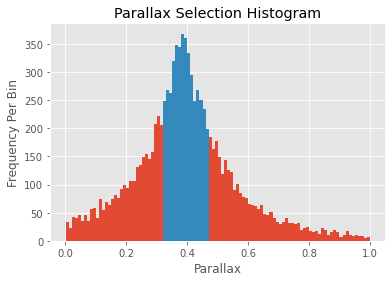

In [49]:
bins = plt.hist(hyades_stars['parallax'], bins = 100)
plt.hist(hyades_parallax['parallax'], bins = bins[1])
plt.title("Parallax Selection Histogram")
plt.xlabel("Parallax")
plt.ylabel("Frequency Per Bin")

Text(0, 0.5, 'Proper Motion (Dec)')

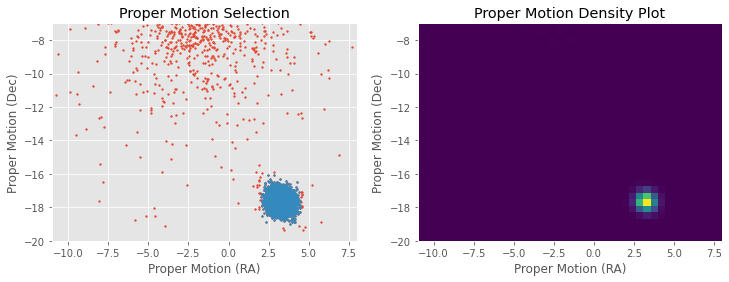

In [50]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].scatter(hyades_stars['pmra'],hyades_stars['pmdec'], s = 3)
ax[0].scatter(hyades_pm['pmra'], hyades_pm['pmdec'], s = 3)
ax[0].set_title("Proper Motion Selection")
ax[0].set_xlabel("Proper Motion (RA)")
ax[0].set_ylabel("Proper Motion (Dec)")
ax[0].set_xlim((-11, 8))
ax[0].set_ylim((-20, -7))
ax[1].hist2d(hyades_stars['pmra'],hyades_stars['pmdec'], bins = 100)
ax[1].sharey(ax[0])
ax[1].sharex(ax[0])
ax[1].set_title("Proper Motion Density Plot")
ax[1].set_xlabel("Proper Motion (RA)")
ax[1].set_ylabel("Proper Motion (Dec)")

In [51]:
print("Total Stars Post All Cuts: ", len(hyades_final))

Total Stars Post All Cuts:  3849


Text(0, 0.5, '$M_G$')

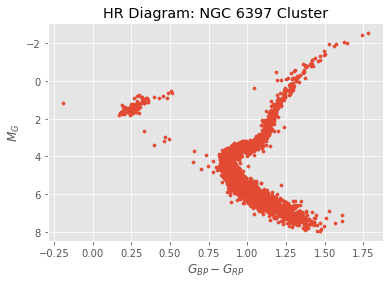

In [52]:
plt.style.use('ggplot')
#plt.scatter(hyades_noq_final['bp_g'] - hyades_noq_final['g_rp'], hyades_noq_final['mg'], s = 10)
#plt.scatter(hyades_final['bp_g'] - hyades_final['g_rp'], hyades_final['mg'], s = 10)
plt.scatter(hyades_final['bp_rp'], hyades_final['mg'], s = 10)
plt.gca().invert_yaxis()
plt.title("HR Diagram: NGC 6397 Cluster")
plt.xlabel("$G_{BP} - G_{RP}$")
plt.ylabel("$M_G$")

Text(0, 0.5, '$M_G$')

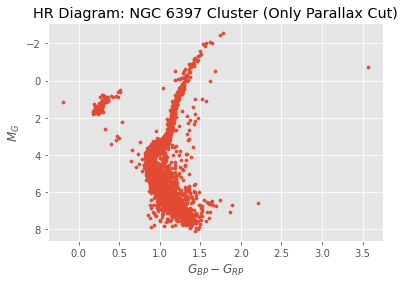

In [53]:
plt.style.use('ggplot')
#plt.scatter(hyades_noq_final['bp_g'] - hyades_noq_final['g_rp'], hyades_noq_final['mg'], s = 10)
plt.scatter(hyades_parallax['bp_rp'], hyades_parallax['mg'], s = 10)
plt.gca().invert_yaxis()
plt.title("HR Diagram: NGC 6397 Cluster (Only Parallax Cut)")
plt.xlabel("$G_{BP} - G_{RP}$")
plt.ylabel("$M_G$")

Text(0, 0.5, '$M_G$')

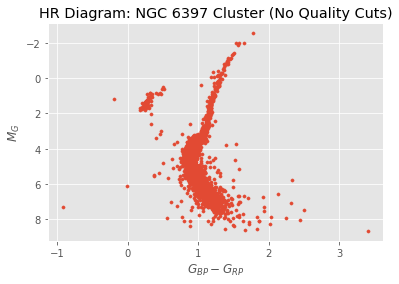

In [54]:
plt.style.use('ggplot')
plt.scatter(hyades_noq_final['bp_rp'], hyades_noq_final['mg'], s = 10)
plt.gca().invert_yaxis()
plt.title("HR Diagram: NGC 6397 Cluster (No Quality Cuts)")
plt.xlabel("$G_{BP} - G_{RP}$")
plt.ylabel("$M_G$")